In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
df_office = pd.read_csv('./data/summary_20230112.csv')
df_office

,case_name,office,aircon,ventilation,exhaust,countTimeMean_onlyFloating
0,office1_0_0,office1,0.0,0.0,off,2991.405667
1,office1_0_123_aout,office1,0.0,123.0,a,2656.982333
2,office1_0_123_bout,office1,0.0,123.0,b,2951.144667
3,office1_0_164_aout,office1,0.0,164.0,a,2470.395667
4,office1_0_164_bout,office1,0.0,164.0,b,3271.053000
...,...,...,...,...,...,...
902,office33_960_164_bout,office33,960.0,164.0,b,2504.354667
903,office33_960_246_aout,office33,960.0,246.0,a,1331.682000
904,office33_960_246_bout,office33,960.0,246.0,b,1495.644000
905,office33_960_82_aout,office33,960.0,82.0,a,2227.621000


In [3]:
df_total = pd.get_dummies(df_office, columns=['exhaust'])
df_total = df_total.set_index('case_name')
df_total

,office,aircon,ventilation,countTimeMean_onlyFloating,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,,,
office1_0_0,office1,0.0,0.0,2991.405667,0,0,1
office1_0_123_aout,office1,0.0,123.0,2656.982333,1,0,0
office1_0_123_bout,office1,0.0,123.0,2951.144667,0,1,0
office1_0_164_aout,office1,0.0,164.0,2470.395667,1,0,0
office1_0_164_bout,office1,0.0,164.0,3271.053000,0,1,0
...,...,...,...,...,...,...,...
office33_960_164_bout,office33,960.0,164.0,2504.354667,0,1,0
office33_960_246_aout,office33,960.0,246.0,1331.682000,1,0,0
office33_960_246_bout,office33,960.0,246.0,1495.644000,0,1,0


In [4]:
# 空調条件データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[['aircon', 'ventilation', 'exhaust_a', 'exhaust_b', 'exhaust_off']]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
df_meta_standardized

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office1_0_0,-1.387753,-1.665425,-0.868534,-0.868534,2.478252
office1_0_123_aout,-1.387753,-0.204554,1.151365,-0.868534,-0.403510
office1_0_123_bout,-1.387753,-0.204554,-0.868534,1.151365,-0.403510
office1_0_164_aout,-1.387753,0.282403,1.151365,-0.868534,-0.403510
office1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510
...,...,...,...,...,...
office33_960_164_bout,1.293167,0.282403,-0.868534,1.151365,-0.403510
office33_960_246_aout,1.293167,1.256316,1.151365,-0.868534,-0.403510
office33_960_246_bout,1.293167,1.256316,-0.868534,1.151365,-0.403510


In [5]:
# 機械学習に用いるDataFrame
df_ml = df_meta_standardized.join(df_total[['office', 'countTimeMean_onlyFloating']])
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_onlyFloating
case_name,,,,,,,
office1_0_0,-1.387753,-1.665425,-0.868534,-0.868534,2.478252,office1,2991.405667
office1_0_123_aout,-1.387753,-0.204554,1.151365,-0.868534,-0.403510,office1,2656.982333
office1_0_123_bout,-1.387753,-0.204554,-0.868534,1.151365,-0.403510,office1,2951.144667
office1_0_164_aout,-1.387753,0.282403,1.151365,-0.868534,-0.403510,office1,2470.395667
office1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,office1,3271.053000
...,...,...,...,...,...,...,...
office33_960_164_bout,1.293167,0.282403,-0.868534,1.151365,-0.403510,office33,2504.354667
office33_960_246_aout,1.293167,1.256316,1.151365,-0.868534,-0.403510,office33,1331.682000
office33_960_246_bout,1.293167,1.256316,-0.868534,1.151365,-0.403510,office33,1495.644000


In [6]:
# 各officeから3パターンずつtestデータとして抜き出す

def split_DataFrame(df_core:pd.DataFrame):
    df_test = pd.DataFrame()
    for office in df_core['office'].unique():
        df = df_core[df_core['office']==office].sample(n=3, random_state=0)
        df_test = pd.concat([df_test, df])
        
    df_train = df_core[~df_core.index.isin(df_test.index)]
        
    return df_train, df_test
        
df_fit, df_test = split_DataFrame(df_ml)

In [7]:
df_test

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_onlyFloating
case_name,,,,,,,
office1_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,office1,3271.053000
office1_960_123_bout,1.293167,-0.204554,-0.868534,1.151365,-0.403510,office1,1546.898667
office1_960_164_aout,1.293167,0.282403,1.151365,-0.868534,-0.403510,office1,999.284000
office2_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,office2,2322.241333
office2_960_164_aout,1.293167,0.282403,1.151365,-0.868534,-0.403510,office2,2461.452000
...,...,...,...,...,...,...,...
office32_960_164_aout,1.293167,0.282403,1.151365,-0.868534,-0.403510,office32,2489.653333
office32_660_0,0.455379,-1.665425,-0.868534,-0.868534,2.478252,office32,3753.406000
office33_0_164_bout,-1.387753,0.282403,-0.868534,1.151365,-0.403510,office33,2137.150000


点群データ準備

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# 三次元点群を描画する関数
def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=1.0, s=1)
    ax.set_aspect('equal')
    plt.show()

In [10]:
point_cloud_dict = np.load('./data/point_cloud_dict.npy', allow_pickle=True).item()
point_cloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

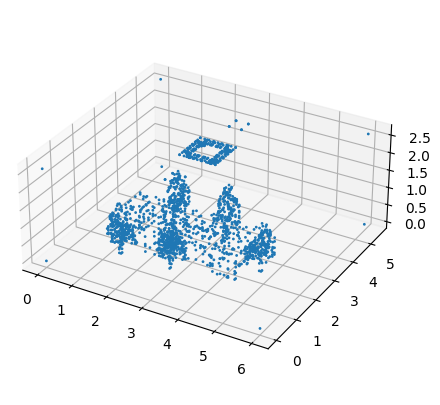

In [11]:
plot3d_points(point_cloud_dict['office1'])

In [12]:
point_cloud_list = []
for i in range(33):
    if i==29:
        continue
    point_cloud_list.append(point_cloud_dict[f'office{i+1}'])

point_cloud_array = np.array(point_cloud_list)

point_cloud_array.shape

(32, 2048, 3)

In [13]:
point_cloud_array_reshape = point_cloud_array.reshape(-1,3)
point_cloud_array_reshape.shape

(65536, 3)

In [14]:
x_mean = []
x_std = []

for i in range(3):
    x_mean.append(np.mean(point_cloud_array_reshape[:,i]))
    x_std.append(np.std(point_cloud_array_reshape[:,i], ddof=0))

print(x_mean)
print(x_std)

[4.060322, 2.6875114, 1.2308416]
[1.9615167, 1.2216018, 0.92776775]


In [15]:
# 3次元点群の標準化定義
def standardization(array:np.array, x_mean, x_std):
    array_std = array.copy()
    for i in range(3):
        array_std[:,i] = (array[:,i] - x_mean[i]) / x_std[i]
    return array_std

officeの分け方

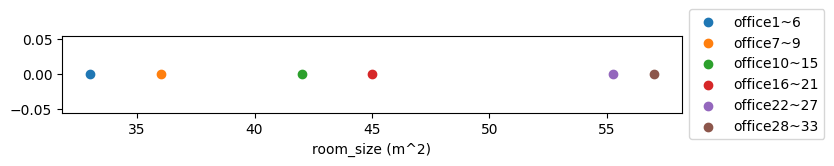

In [16]:
fig = plt.figure(figsize=(8,1))
ax = fig.add_subplot(xlabel='room_size (m^2)')
ax.scatter(33, 0, label='office1~6')
ax.scatter(36, 0, label='office7~9')
ax.scatter(42, 0, label='office10~15')
ax.scatter(45, 0, label='office16~21')
ax.scatter(55.25, 0, label='office22~27')
ax.scatter(57, 0, label='office28~33')
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

In [17]:
# 部屋形状6パターン
office_split_list_tmp = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33],
                         [1, 2, 3, 4, 5, 6],
                         [7, 8, 9],
                         [10, 11, 12, 13, 14, 15],
                         [16, 17, 18, 19, 20, 21],
                         [22, 23, 24, 25, 26, 27],
                         [28, 30, 31, 32, 33]]
office_split_list_1 = []
for i in range(len(office_split_list_tmp)):
    office_split_list_1.append(['office' + str(num) for num in office_split_list_tmp[i]])

# 部屋サイズ（大中小）
office_split_list_tmp = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33],
                         [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
                         [22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33]]
office_split_list_2 = []
for i in range(len(office_split_list_tmp)):
    office_split_list_2.append(['office' + str(num) for num in office_split_list_tmp[i]])

学習準備

In [18]:
import keras
from keras.callbacks import EarlyStopping

2023-08-01 14:16:22.906106: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-01 14:16:22.907894: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-01 14:16:22.940932: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-01 14:16:22.941847: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 14:16:23.608013: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [19]:
model_str = open('./data/optuna_best_model.json').read()
original_model = keras.models.model_from_json(model_str)

original_model.load_weights('./data/only_office_best_weights.hdf5')

original_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.006781976583074642), # optunaの探索結果
    loss='mse',
    metrics=['mae'],
)

original_model.summary()

Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud (InputLayer)        [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2048, 32)     128         ['pointCloud[0][0]']             
                                                                                                  
 batch_normalization (BatchNorm  (None, 2048, 32)    128         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 2048, 32)     0           ['batch_normalization

In [20]:
def split_data(office_split_list):
    X_dict_lists = []
    y_lists = []
    
    for split_pattern in office_split_list:

        X_dict_list = []
        y_list = []
        tmp_df_list = []
        tmp_df_list.append(df_ml[df_ml['office'].isin(split_pattern)])
        tmp_df_list.append(df_fit[df_fit['office'].isin(split_pattern)])
        tmp_df_list.append(df_test[df_test['office'].isin(split_pattern)])

        for i in range(3):

            tmp_point_cloud = []
            for office in tmp_df_list[i]['office']:
                tmp_point_cloud.append(standardization(point_cloud_dict[office], x_mean, x_std))
            tmp_X_dict = {'meta' : tmp_df_list[i][['aircon', 'ventilation', 'exhaust_a', 'exhaust_b', 'exhaust_off']],
                          'pointCloud' : np.array(tmp_point_cloud)}
            X_dict_list.append(tmp_X_dict)

            y_list.append(tmp_df_list[i]['countTimeMean_onlyFloating'])

        X_dict_lists.append(X_dict_list)
        y_lists.append(y_list)

    return X_dict_lists, y_lists

In [21]:
'''
lists = [[all, fit, test], # pattern1
         [all, fit, test], # pattern2
                :         
                :       
                         ]
'''

'\nlists = [[all, fit, test], # pattern1\n         [all, fit, test], # pattern2\n                :         \n                :       \n                         ]\n'

In [22]:
def model_fit(X_dict_fit, X_dict_test, y_fit, y_test):

    model_str = open('./data/optuna_best_model.json').read()
    model = keras.models.model_from_json(model_str)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.006781976583074642), # optunaの探索結果
        loss='mse',
        metrics=['mae'],
        )
    
    history = model.fit(
        X_dict_fit, y_fit,
        validation_data = (X_dict_test, y_test),
        epochs = 1000,
        batch_size=64,  # optunaの探索結果
        callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=100, restore_best_weights=True,)])
    
    df_hist = pd.DataFrame(history.history)

    return model, df_hist

学習

In [23]:
load_weights = False

X_dict_lists_1, y_lists_1 = split_data(office_split_list_1)
X_dict_lists_2, y_lists_2 = split_data(office_split_list_2)

if load_weights:

    size = len(office_split_list_1) - 1
    model_list_1 = []
    
    for i in range(size):
        model_str = open('./data/optuna_best_model.json').read()
        model = keras.models.model_from_json(model_str)
        model.load_weights(f'./output/model1_{i+1}_weights.hdf5')
        model_list_1.append(model)


    size = len(office_split_list_2) - 1
    model_list_2 = []
    
    for i in range(size):
        model_str = open('./data/optuna_best_model.json').read()
        model = keras.models.model_from_json(model_str)
        model.load_weights(f'./output/model2_{i+1}_weights.hdf5')
        model_list_2.append(model)


    df_hist_list_1 = np.load('./output/df_hist_list_1.npy', allow_pickle=True)
    df_hist_list_2 = np.load('./output/df_hist_list_2.npy', allow_pickle=True)


else:

    model_list_1 = []
    df_hist_list_1 = []

    for i in range(len(office_split_list_1)-1):
        model, df_hist = model_fit(X_dict_lists_1[i+1][1], X_dict_lists_1[i+1][2], y_lists_1[i+1][1], y_lists_1[i+1][2])
        model_list_1.append(model)
        df_hist_list_1.append(df_hist)


    model_list_2 = []
    df_hist_list_2 = []

    for i in range(len(office_split_list_2)-1):
        model, df_hist = model_fit(X_dict_lists_2[i+1][1], X_dict_lists_2[i+1][2], y_lists_2[i+1][1], y_lists_2[i+1][2])
        model_list_2.append(model)
        df_hist_list_2.append(df_hist)

Epoch 1/1000
3/3 [==============================] - 1s 199ms/step - loss: 3188057.2500 - mae: 1672.7496 - val_loss: 989899.1250 - val_mae: 845.5922
Epoch 2/1000
3/3 [==============================] - 0s 113ms/step - loss: 798859.3125 - mae: 748.7354 - val_loss: 716111.7500 - val_mae: 753.9042
Epoch 3/1000
3/3 [==============================] - 0s 110ms/step - loss: 574968.4375 - mae: 596.7350 - val_loss: 738875.8750 - val_mae: 699.4257
Epoch 4/1000
3/3 [==============================] - 0s 110ms/step - loss: 725456.5625 - mae: 627.7250 - val_loss: 383562.2812 - val_mae: 433.0554
Epoch 5/1000
3/3 [==============================] - 0s 109ms/step - loss: 378847.5625 - mae: 459.5359 - val_loss: 471886.8438 - val_mae: 598.8534
Epoch 6/1000
3/3 [==============================] - 0s 113ms/step - loss: 495606.9688 - mae: 616.2620 - val_loss: 277212.6875 - val_mae: 415.5216
Epoch 7/1000
3/3 [==============================] - 0s 111ms/step - loss: 362680.1562 - mae: 432.7428 - val_loss: 427643.3

In [24]:
# モデル重み・学習履歴保存

for i, mod in enumerate(model_list_1):
    mod.save_weights(f'./output/model1_{i+1}_weights.hdf5')

for i, mod in enumerate(model_list_2):
    mod.save_weights(f'./output/model2_{i+1}_weights.hdf5')

np.save('./output/df_hist_list_1', df_hist_list_1)
np.save('./output/df_hist_list_2', df_hist_list_2)

/home/gakubu2/.local/lib/python3.10/site-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


予測精度

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [58]:
def calculate_mae_rmse(X_dict_lists, y_lists, model_list):

    num = 0 # 0:all, 1:fit, 2:test

    tmp_model_list = [original_model] + model_list
    size = len(tmp_model_list)

    array_mae = np.zeros((size, size))
    array_rmse = np.zeros((size, size))

    for i in range(size):

        for j in range(size):

            pred_y = tmp_model_list[i].predict(X_dict_lists[j][num])
            array_mae[i,j] = mean_absolute_error(y_lists[j][num], pred_y)
            array_rmse[i,j] = np.sqrt(mean_squared_error(y_lists[j][num], pred_y))

    columns = ['all'] + [n+1 for n in range(size-1)]

    df_mae = pd.DataFrame(array_mae, index=columns, columns=columns)
    df_rmse = pd.DataFrame(array_rmse, index=columns, columns=columns)

    return df_mae, df_rmse

In [27]:
# ヒートマップを表示する関数
def plot_heatmap(df):
    sns.heatmap(df, annot=True, fmt='.0f', cmap='viridis')
    plt.show()

In [50]:
df_mae_1, df_rmse_1 = calculate_mae_rmse(X_dict_lists_1, y_lists_1, model_list_1)

5/5 [==============================] - 0s 8ms/step


In [51]:
df_mae_2, df_rmse_2 = calculate_mae_rmse(X_dict_lists_2, y_lists_2, model_list_2)

10/10 [==============================] - 0s 9ms/step


In [52]:
df_mae_1

,all,1,2,3,4,5,6
all,183.590825,207.102333,142.016246,192.951745,160.315931,158.377610,225.427058
1,802.580596,259.776370,1104.950893,468.765660,832.223305,1236.450052,1159.535719
2,556.663769,446.280537,260.970556,580.146989,483.315482,896.707499,526.998147
3,469.625520,424.560774,357.236651,186.039389,652.763522,578.013565,585.149440
4,524.674640,411.584962,892.746967,457.792486,273.924168,689.777325,631.460406
5,550.159592,678.648315,220.545483,366.788014,672.989092,170.764452,1111.570706
6,511.339046,504.886403,656.899867,441.370803,537.926749,710.216940,245.655896


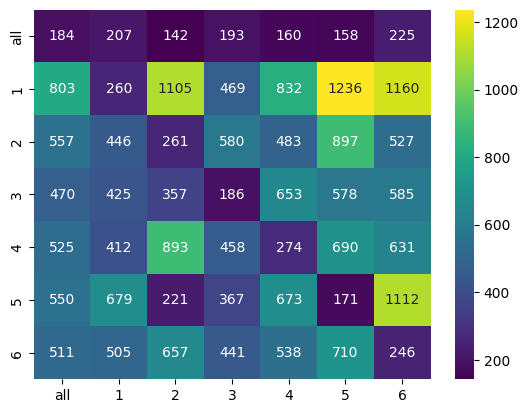

In [53]:
plot_heatmap(df_mae_1)

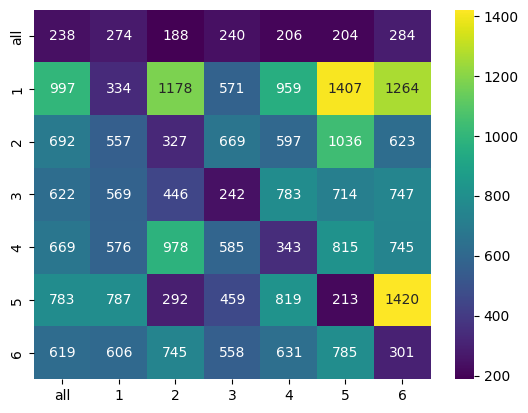

In [54]:
plot_heatmap(df_rmse_1)

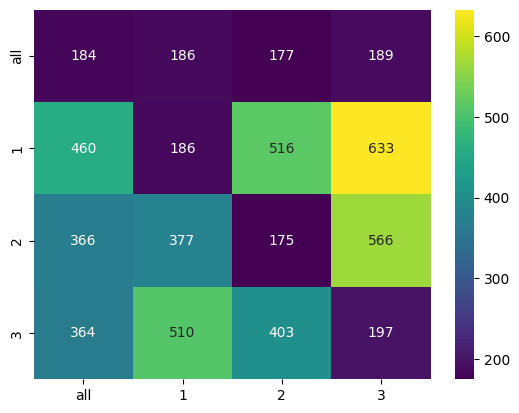

In [55]:
plot_heatmap(df_mae_2)

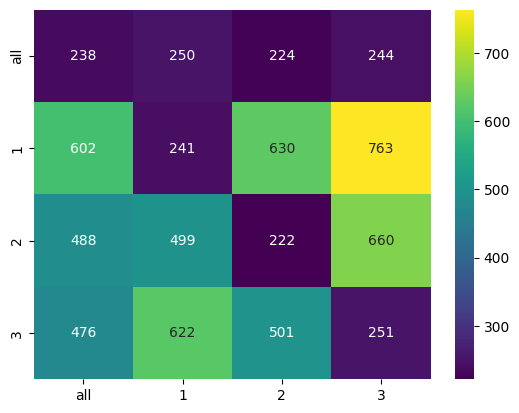

In [56]:
plot_heatmap(df_rmse_2)

In [47]:
# 学習曲線をプロットする関数

def plot_learning_curve(df_hist):
    fig = plt.figure(figsize=(6,4))

    ax = fig.add_subplot(
        xlabel='epochs',
        ylabel='loss'
    )
    x = np.array(range(len(df_hist)))
    y = df_hist['loss']
    ax.plot(x, y, label='loss')

    y = df_hist['val_loss']
    ax.plot(x, y, label='val_loss')

    ax.legend(bbox_to_anchor=(1,1), loc='upper right')
    plt.show()

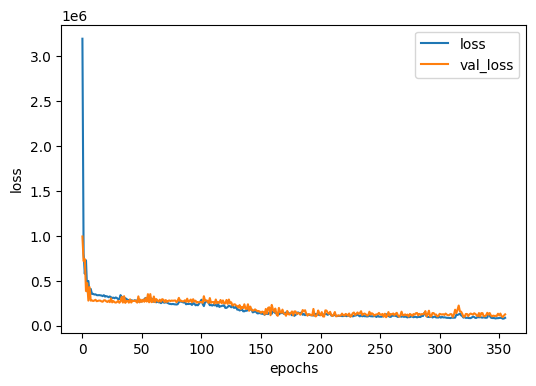

In [48]:
plot_learning_curve(df_hist_list_1[0])